<a href="https://colab.research.google.com/github/Anurag1325/Emotion_detection/blob/main/Respiratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all necessaries lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import butter,lfilter,freqz

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import skew, kurtosis
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy.signal import hilbert
from sklearn.metrics import accuracy_score

# Connecting the gooogle collab with drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data set from drive

In [4]:
data_set=pd.read_csv('/content/drive/MyDrive/Respiration belt2.csv')
data_set

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
0,764.434948,636.028935,1071.121882,984.840791,836.309815,689.685086,1248.527804,1249.777801,1151.434233,1060.778151,...,1318.496424,1486.152365,1520.808551,1197.402898,1142.996749,769.153689,1384.683802,1010.809493,1283.121490,1519.964802
1,1138.443046,-84.929693,44.445068,1081.349402,2794.564986,1944.472807,2884.127321,2627.815294,2645.971511,2654.471495,...,-159.367056,277.319637,195.757288,122.444923,-161.742051,644.193959,1012.130780,-162.148301,-366.241674,-451.866515
2,958.143168,1496.579673,390.206717,-167.886002,-90.948644,1844.391530,1986.672517,1572.985782,1731.797988,1136.205339,...,37.582369,61.082325,384.706727,1386.736126,1056.892985,2268.265747,2780.796050,2589.921403,1611.766960,766.674772
3,397.768064,132.643554,116.581083,206.987166,4.425041,100.299863,12.706275,340.518170,199.299681,188.080951,...,-175.637127,-42.012374,-741.542331,-497.355282,-1293.385061,-1283.353830,-1376.197408,-1412.634841,-1341.041223,-964.916918
4,-2252.860828,-1809.174147,-1805.767904,-1764.580480,-1706.236838,-1651.924438,-1903.986472,-1983.923824,-1988.955065,-1940.017656,...,-1022.019352,-1358.799980,-1225.737725,-1297.143843,-1383.487434,-1411.206133,-1326.800039,-1059.675532,-982.456925,-734.769883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-7.195136,19.523564,11.211080,6.242339,38.179780,0.148600,27.679799,24.054806,-9.507632,23.054808,...,84.992193,54.242250,67.398476,61.679736,47.117263,76.867208,41.242274,61.929736,67.554725,38.804779
1276,-67.876502,-87.938965,-65.876506,-83.720223,-96.438949,-73.095243,-105.063933,-58.657769,-58.407770,-71.126496,...,-7.064115,-9.220361,8.810856,-25.095331,-8.782861,-28.001576,-26.657828,3.748365,-24.345333,4.967113
1277,22.953978,-25.452183,10.704000,-19.327194,-36.170913,-1.139728,-40.858404,-28.452177,-46.077145,-65.670858,...,78.047626,63.610153,61.172657,91.735101,51.641425,68.953893,65.172650,54.078920,91.703851,51.547675
1278,-8.281397,-6.156401,-21.187624,2.124833,-27.281362,-10.281394,-1.812659,-26.562614,1.343585,-26.031365,...,64.718468,45.281004,40.718512,65.062217,43.468507,74.593449,50.249744,39.187265,59.249728,30.499781


#Data cleaning

In [5]:
data_set.drop_duplicates(inplace=True)
from scipy import stats
import pandas as pd

# Reset the index if needed
data_set.reset_index(drop=True, inplace=True)
data_set.fillna(0, inplace=True)
# Identify missing values
missing_values = data_set.isnull().sum()

# Impute missing values (if needed)
# Example: Fill missing values with the mean of the column
data_set.fillna(data_set.mean(), inplace=True)

# Remove rows with missing values (if needed)
# Example: Remove rows with any missing value
data_set.dropna(axis=0, inplace=True)


In [6]:
is_infinity = data_set.isin([float('inf'), float('-inf')])
print("\nInfinity values:")
print(is_infinity)


Infinity values:
          0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1275  False  False  False  False  False  False  False  False  False  False   
1276  False  False  False  False  False  False  False  False  False  False   
1277  False  False  False  False  False  False  False  False  False  False   
1278  False  False  False  False  False  False  False  False  False  False   
1279  False  False  False  False  False  False  False  False  False  False   

      ...   7670   7671   7672   7673   7674 

In [7]:
Fs = 128  # Replace with your actual sampling frequency
t = np.arange(0, 60, 1/Fs)  #time values

**Amplitude vs Frequency**

In [8]:
# Choose the row index to plot
row_idx = 147
# Compute the FFT and magnitude spectrum
# Assuming data_set is a DataFrame and you want to select the row with index 'row_idx'
signal = data_set.iloc[row_idx, :]


freqs = np.fft.fftfreq(signal.size, d=1/Fs)
magnitude_spectrum = np.abs(np.fft.fft(signal))



Amplitude vs freq plot(raw signal)

In [9]:
# Number of samples in each row
num_samples = data_set.shape[1]
# Compute the FFT for each row
fft_results = np.fft.fft(data_set, axis=1)


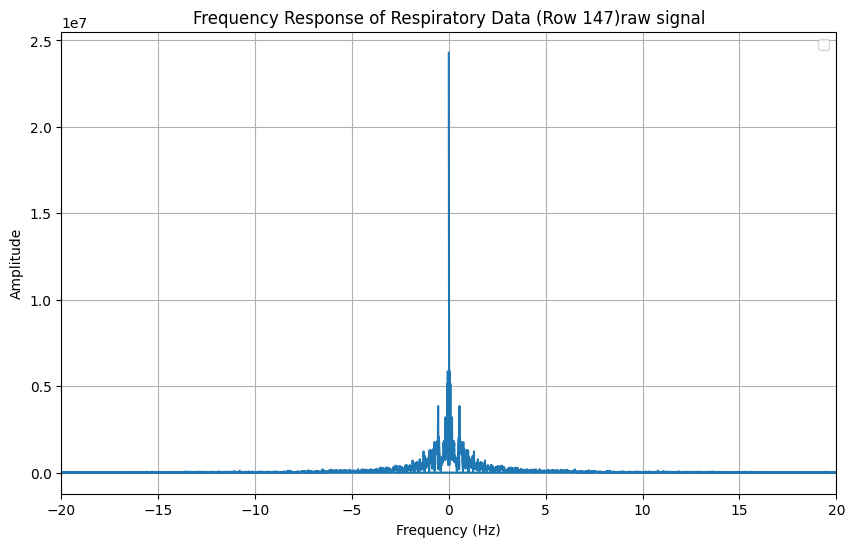

In [10]:
# Plot the frequency response for a specific row
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(fft_results[row_idx]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title(f'Frequency Response of Respiratory Data (Row {row_idx})raw signal')
plt.xlim(-20,20)
plt.grid()
plt.legend()
plt.show()

**Check the breathing pattern for the particular row**

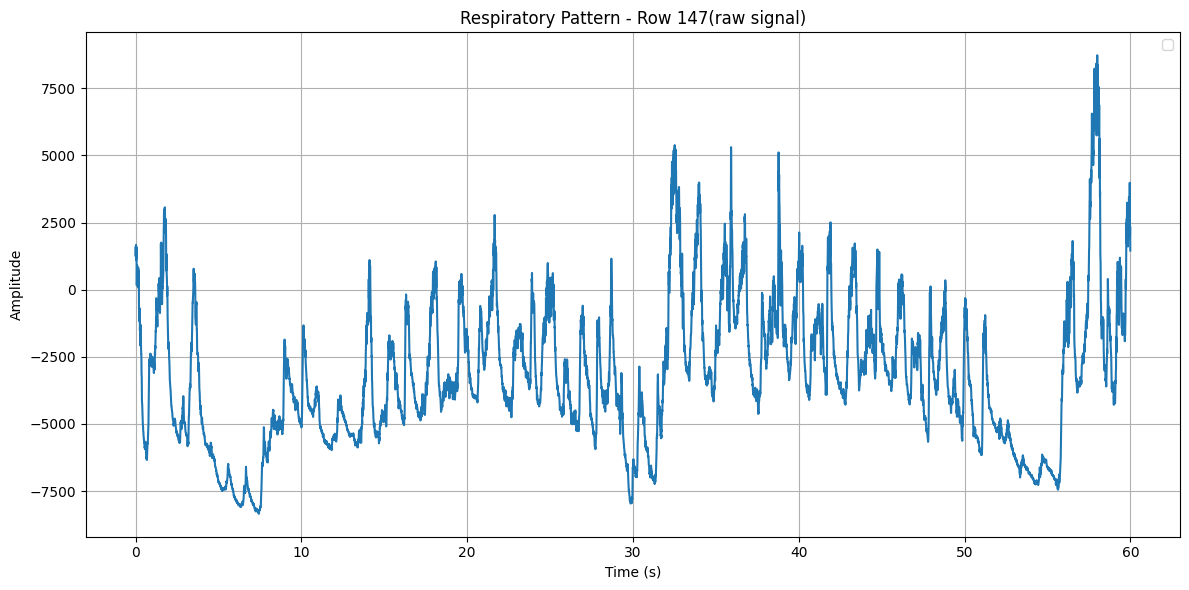

In [11]:
# Convert the selected row to a NumPy array
selected_row = data_set.iloc[row_idx, :]
# Plot the breathing pattern for the selected row
plt.figure(figsize=(12, 6))
plt.plot(t, selected_row)
plt.title(f'Respiratory Pattern - Row {row_idx}(raw signal)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

# Denoising(BANDPASS FILTER)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, lfilter, detrend
# Define the row index you want to plot
row_idx = 147  # Change this to the desired row index
# Extract the signal for the specified row
original_signal = data_set.iloc[row_idx, :]
# Define epoch parameters (same as before)
epoch_length = 5
overlap = 1
Fs = 128
samples_per_epoch = int(epoch_length * Fs)
samples_overlap = int(overlap * Fs)

# Define high-pass and low-pass filter cutoff frequencies (same as before)
highcut_hp = 0.1
lowcut_lp = 0.5
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
# Create high-pass and low-pass filters (same as before)
b_hp, a_hp = butter_highpass(highcut_hp, Fs)
b_lp, a_lp = butter_lowpass(lowcut_lp, Fs)
# Define wavelet decomposition parameters
wavelet = 'db4'  # Choose a wavelet family (e.g., 'db4')
level = 6         # Choose the level of decomposition

# Apply high-pass filter to remove baseline wander
baseline_removed_signal = lfilter(b_hp, a_hp, original_signal)

# Apply low-pass filter to reduce noise spikes
filtered_signal = lfilter(b_lp, a_lp, baseline_removed_signal)

# Detrend the filtered data
detrended_signal = detrend(filtered_signal)

# Normalize the detrended data to the range [-1, 1]
min_val = np.min(detrended_signal)
max_val = np.max(detrended_signal)
normalized_signal = -1 + (2 * (detrended_signal - min_val) / (max_val - min_val))

# Perform wavelet decomposition
coeffs = pywt.wavedec(normalized_signal, wavelet, level=level)

# Extract the detail coefficients corresponding to the respiratory signal
detail_coeff = coeffs[1]  # You may need to adjust the index based on your decomposition

# Reconstruct the respiratory signal from the detail coefficients
reconstructed_signal = pywt.waverec([None, detail_coeff], wavelet)

# Create a time vector based on the sampling frequency and signal length for the original signal
time_original = np.arange(0, len(original_signal)) / Fs

# Create a time vector based on the sampling frequency and signal length for the reconstructed signal
time_reconstructed = np.arange(0, len(reconstructed_signal)) / Fs



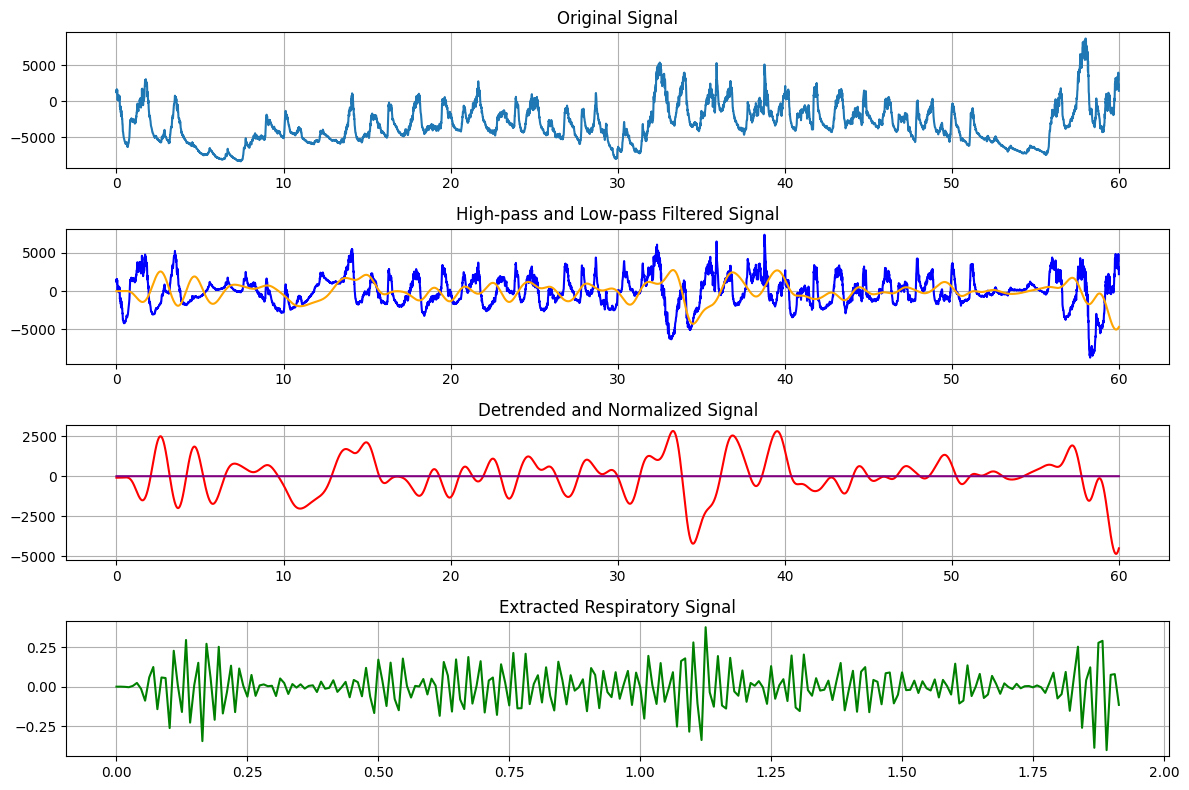

In [13]:
# Plot the signals
plt.figure(figsize=(12, 8))

# Original Signal
plt.subplot(4, 1, 1)
plt.plot(time_original, original_signal, label='Original Signal')
plt.title('Original Signal')
plt.grid()

# High-pass and Low-pass Filtered Signal
plt.subplot(4, 1, 2)
plt.plot(time_original, baseline_removed_signal, label='High-pass Filtered Signal', color='blue')
plt.plot(time_original, filtered_signal, label='Low-pass Filtered Signal', color='orange')
plt.title('High-pass and Low-pass Filtered Signal')
plt.grid()

# Detrended and Normalized Signal
plt.subplot(4, 1, 3)
plt.plot(time_original, detrended_signal, label='Detrended Signal', color='red')
plt.plot(time_original, normalized_signal, label='Normalized Signal', color='purple')
plt.title('Detrended and Normalized Signal')
plt.grid()

# Extracted Respiratory Signal
plt.subplot(4, 1, 4)
plt.plot(time_reconstructed, reconstructed_signal, label='Extracted Respiratory Signal', color='green')
plt.title('Extracted Respiratory Signal')
plt.grid()

plt.tight_layout()
plt.show()

# Amplitude vs freq (filtered signal)

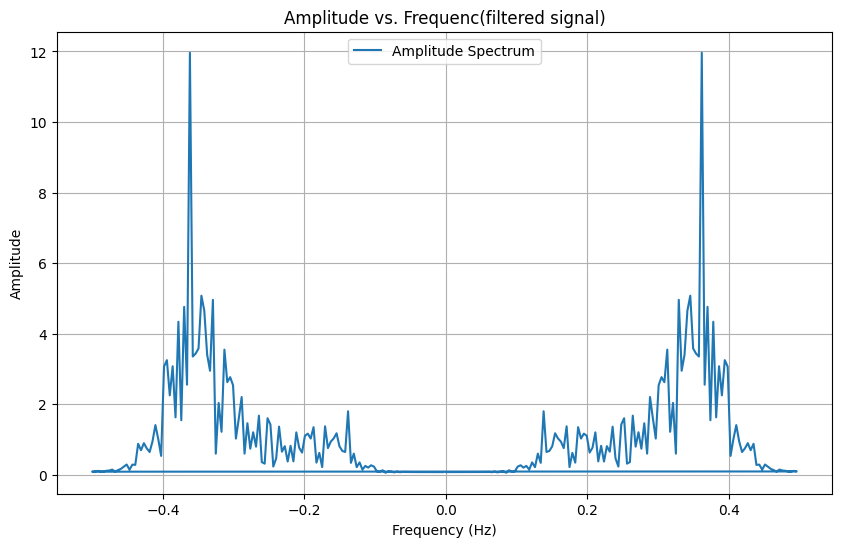

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
# Compute the FFT of the reconstructed signal
fft_result = fft(reconstructed_signal)
fft_freq = np.fft.fftfreq(len(fft_result))  # Frequency bins
# Calculate the amplitude spectrum (absolute values of FFT)
amplitude_spectrum = np.abs(fft_result)
# Plot the amplitude vs. frequency
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, amplitude_spectrum, label='Amplitude Spectrum')
plt.title('Amplitude vs. Frequenc(filtered signal)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
#plt.xlim(0, 0.4)  # Limit the x-axis to the positive frequencies (Nyquist limit)
plt.legend()
plt.show()

# **Peak of the signal and resipration rate calculation*

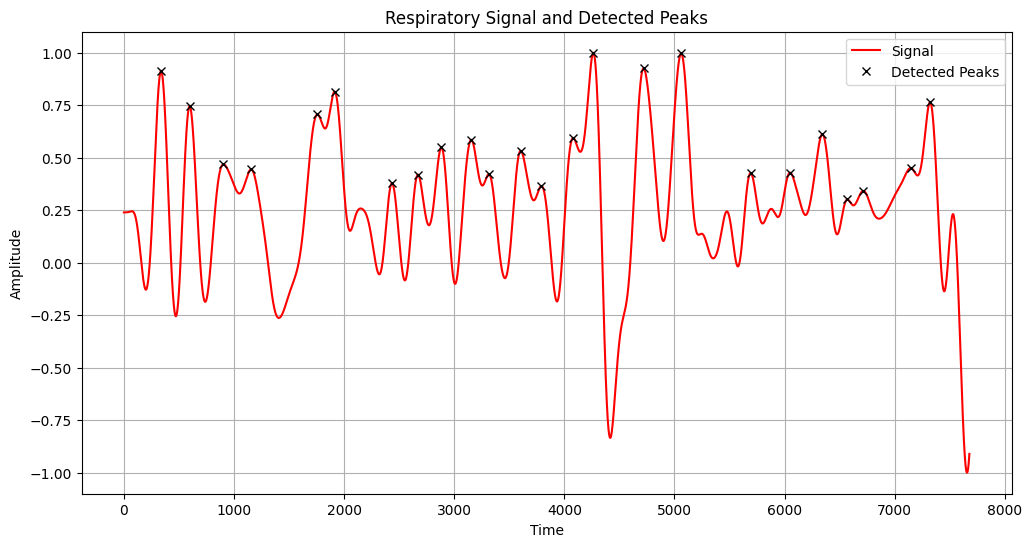

In [15]:
# Apply peak detection to find the indices of peaks in the signal
peaks, _ = find_peaks(normalized_signal, height=0.3)
# Calculate the time difference between consecutive peaks
time_diffs = np.diff(peaks) / Fs

# Calculate the average respiratory rate (breaths per minute)
respiration_rate = 60 / np.mean(time_diffs)

#print(f'Respiration Rate: {filtered_signal:.2f} breaths per minute')

# Plot the signal and detected peaks
plt.figure(figsize=(12, 6))
plt.plot(normalized_signal, label='Signal',color='red')
plt.plot(peaks, normalized_signal[peaks], 'x', label='Detected Peaks', color='black')
plt.title('Respiratory Signal and Detected Peaks')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
#plt.xlim(0,2000)
plt.show()


# Pre processing of data(each and every row)

In [16]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

# Convert the DataFrame to a NumPy array
data_set_array = data_set.to_numpy()

# Remove any extra rows if the dataset has more than 1280 rows
if data_set_array.shape[0] > 1280:
    data_set_array = data_set_array[:1280, :]

# Define filter parameters
Fs = 128  # Sampling frequency
lowcut_lp = 0.5  # Low-pass filter cut-off frequency (0.5 Hz)
highcut_hp = 0.05  # High-pass filter cut-off frequency (0.05 Hz)

# Create low-pass and high-pass Butterworth filters
def butter_lowpass(lowcut, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = lowcut / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(highcut, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = highcut / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Initialize an empty list to store filtered rows
filtered_rows = []

# Iterate through each row and apply filtering
for row in data_set_array:
    # Transpose the row before filtering
    row = row[:, np.newaxis]

    # Apply low-pass filter to reduce noise spikes
    b_lp, a_lp = butter_lowpass(lowcut_lp, Fs)
    lowpass_filtered_row = lfilter(b_lp, a_lp, row, axis=0)

    # Apply high-pass filter to remove baseline wander
    b_hp, a_hp = butter_highpass(highcut_hp, Fs)
    highpass_filtered_row = lfilter(b_hp, a_hp, lowpass_filtered_row, axis=0)

    # Transpose the filtered row back to its original shape
    highpass_filtered_row = highpass_filtered_row.squeeze()

    # Append the filtered row to the list
    filtered_rows.append(highpass_filtered_row)

# Convert the list of filtered rows to a NumPy array
filtered_data = np.array(filtered_rows)

# Create a DataFrame from the filtered data
pre_data_df = pd.DataFrame(filtered_data)

# Now, 'pre_data_df' contains the preprocessed respiratory signals with both low-pass and high-pass filtering
# The shape of 'pre_data_df' will be (1280, 7680)


In [17]:
pre_data_df

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
0,1.673969e-05,1.466644e-04,0.000659,0.002070,0.005175,0.011037,0.020950,0.036426,0.059243,0.091450,...,482.976012,499.539930,515.788877,531.717082,547.319022,562.589381,577.522995,592.114847,606.360098,620.254115
1,2.492976e-05,1.958195e-04,0.000768,0.002095,0.004684,0.009434,0.017877,0.032261,0.055570,0.091488,...,-626.632062,-643.223061,-659.525468,-675.535829,-691.251308,-706.669670,-721.789216,-736.608674,-751.127166,-765.344317
2,2.098153e-05,1.991443e-04,0.000927,0.002878,0.006867,0.013722,0.024397,0.040209,0.062969,0.094945,...,982.849441,999.808528,1016.440051,1032.731098,1048.669007,1064.241540,1079.437061,1094.244716,1108.654547,1122.657397
3,8.710373e-06,7.197312e-05,0.000299,0.000857,0.001958,0.003836,0.006743,0.010934,0.016690,0.024338,...,-843.075353,-844.571237,-845.901008,-847.063130,-848.056261,-848.879336,-849.531665,-850.012980,-850.323447,-850.463642
4,-4.933342e-05,-4.308044e-04,-0.001901,-0.005795,-0.013986,-0.028827,-0.053096,-0.089975,-0.143048,-0.216291,...,255.016804,267.400625,279.523941,291.385362,302.983732,314.318114,325.387760,336.192113,346.730831,357.003833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-1.575600e-07,-8.218347e-07,-0.000001,0.000002,0.000017,0.000057,0.000139,0.000288,0.000532,0.000901,...,-11.347420,-11.287186,-11.228504,-11.171406,-11.115935,-11.062148,-11.010110,-10.959898,-10.911599,-10.865305
1276,-1.486368e-06,-1.371178e-05,-0.000063,-0.000200,-0.000498,-0.001053,-0.001986,-0.003437,-0.005566,-0.008543,...,-13.005859,-13.071611,-13.139044,-13.208215,-13.279175,-13.351977,-13.426674,-13.503321,-13.581974,-13.662688
1277,5.026490e-07,3.428376e-06,0.000012,0.000027,0.000048,0.000068,0.000075,0.000047,-0.000043,-0.000235,...,19.392236,19.506943,19.618185,19.725949,19.830223,19.931001,20.028278,20.122050,20.212315,20.299072
1278,-1.813470e-07,-1.572796e-06,-0.000007,-0.000023,-0.000059,-0.000129,-0.000249,-0.000439,-0.000723,-0.001126,...,20.360067,20.482893,20.603305,20.721234,20.836613,20.949382,21.059485,21.166872,21.271500,21.373326


In [18]:
file_path=('pre_process_data.csv')
pre_data_df.to_csv(file_path,index=False)

# feature extraction of data(all rows)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import find_peaks
from scipy.fft import fft
from scipy.signal import stft
import pywt
# Define functions to compute various statistical and signal features
def compute_max_value(signal):
    return np.max(signal)

def compute_arithmetic_mean(signal):
    return np.mean(signal)

def compute_min_value(signal):
    return np.min(signal)

def compute_std_deviation(signal):
    return np.std(signal)

def compute_variance(signal):
    return np.var(signal)

def compute_skewness(signal):
    return skew(signal)

def compute_kurtosis(signal):
    return kurtosis(signal)

def compute_median(signal):
    return np.median(signal)

def compute_zero_crossings(signal):
    return len(np.where(np.diff(np.sign(signal)))[0])

def compute_entropy(signal):
    return entropy(signal)

def compute_mean_energy(signal):
    return np.mean(np.square(signal))

def compute_moments(signal, order):
    return np.mean(np.power(signal, order))

def compute_change_in_signal(signal):
    return np.abs(np.diff(signal)).sum()

# Function to compute respiration rate from a signal
def compute_respiration_rate(signal, fs=128):
    # Assuming the signal represents respiration, find peaks using scipy's find_peaks
    peaks, _ = find_peaks(signal, height=0.1, distance=fs)  # Adjust height and distance as needed
    num_peaks = len(peaks)

    # Calculate respiration rate (breaths per minute)
    respiration_rate = (num_peaks / len(signal)) * 60

    return respiration_rate

# Function to compute heart rate from a signal
def compute_heart_rate(signal, sampling_rate=128):
    # Find peaks in the signal (assuming heartbeats)
    peaks, _ = find_peaks(signal, height=0.1, distance=sampling_rate)  # Adjust height and distance as needed

    # Calculate the heart rate in beats per minute (bpm)
    heart_rate = (len(peaks) / len(signal)) * 60

    return heart_rate

# Function to compute Mean amplitude
def compute_mean_amplitude(signal):
    return np.mean(np.abs(signal))

# Function to compute Mean absolute frequency deviation (Mean_abs_fd)
def compute_mean_abs_fd(signal, fs=128):
    # Compute the FFT (Fast Fourier Transform) of the signal
    fft_signal = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_signal), 1/fs)

    # Calculate the mean absolute frequency deviation
    mean_abs_fd = np.mean(np.abs(freqs * np.abs(fft_signal)))

    return mean_abs_fd

# Function to compute Root Mean Square (RMS)
def compute_rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

# Function to compute respiration amplitude
def compute_respiration_amplitude(signal):
    return np.max(signal) - np.min(signal)

# Function to compute tidal volume
def compute_tidal_volume(signal):
    return np.abs(compute_respiration_amplitude(signal))
# Function to compute Power
def compute_power(signal):
    return np.sum(np.square(signal))

# Function to compute Higher Order Crossings (HOC)
def compute_higher_order_crossings(signal, threshold=0.0):
    return len(np.where(np.abs(np.diff(np.sign(signal - threshold))) > 0)[0])

# Function to compute Fractal Dimension (FD) - Higuchi's FD
def compute_fractal_dimension(signal, k_max=10):
    n = len(signal)
    Lmk = np.zeros((k_max,))

    for k in range(1, k_max + 1):
        Lm = 0
        for m in range(1, k + 1):
            Lmk_m = np.sum(np.abs(np.diff(signal[m - 1::k])))
            Lm += Lmk_m * (n - 1) / (((n - m) // k) * k)
        Lm /= k
        Lmk[k - 1] = Lm

    slope, _ = np.polyfit(np.log(range(1, k_max + 1)), np.log(Lmk), 1)
    return slope

# Function to compute Hjorth Features
def compute_hjorth_features(signal):
    diff1 = np.diff(signal)
    diff2 = np.diff(diff1)
    activity = np.var(signal)
    mobility = np.sqrt(np.var(diff1) / activity)
    complexity = np.sqrt(np.var(diff2) / np.var(diff1))
    return activity, mobility, complexity

# Function to compute Non-Stationarity Index (NSI)
def compute_non_stationarity_index(signal):
    diff = np.abs(np.diff(signal))
    nsi = np.mean(diff) / np.std(diff)
    return nsi
# Function to compute Power Spectral Density (PSD)
# Function to compute Power Spectral Density (PSD)
def compute_psd(signal, fs=128):
    f, t, Zxx = stft(signal, fs=fs, nperseg=256)  # Using stft from scipy.signal
    magnitude_squared = np.abs(Zxx)**2
    return np.sum(magnitude_squared)


# Function to compute Discrete Wavelet Transform (DWT)
def compute_dwt_features(signal, wavelet='db4', level=5):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    dwt_features = []
    for coef in coeffs:
        dwt_features.extend([np.mean(coef), np.std(coef)])
    return dwt_features

# Function to compute Relative Energy Expenditure (REE)
def compute_ree(signal, fs=128):
    total_energy = np.sum(np.square(signal))
    return total_energy / (fs * len(signal))

# Function to compute RMS (Root Mean Square)
def compute_rms(signal):
    return np.sqrt(np.mean(np.square(signal)))
# Updated extract_features_from_window function
def extract_features_from_window(window):
    features = [
        compute_arithmetic_mean(window),
        compute_max_value(window),
        compute_min_value(window),
        compute_std_deviation(window),
        compute_variance(window),
        compute_skewness(window),
        compute_kurtosis(window),
        compute_median(window),
        compute_zero_crossings(window),
        compute_entropy(window),
        compute_mean_energy(window),
        compute_mean_amplitude(window),
        compute_mean_abs_fd(window),
        compute_rms(window),
        compute_respiration_rate(window),
        compute_respiration_amplitude(window),
        compute_tidal_volume(window),
        compute_power(window),
        compute_higher_order_crossings(window),
        compute_fractal_dimension(window),
        *compute_hjorth_features(window),
        compute_non_stationarity_index(window),
        compute_psd(window, fs=Fs),
        *compute_dwt_features(window),
        compute_ree(window, fs=Fs),
        compute_rms(window)
    ]

    for order in [1, 2, 3, 4]:
        features.append(compute_moments(window, order))

    features.append(compute_change_in_signal(window))

    # Additional frequency domain features
    fft_window = fft(window)
    freqs = np.fft.fftfreq(len(fft_window), 1/Fs)
    magnitude_spectrum = np.abs(fft_window)

    features.append(np.sum(magnitude_spectrum))  # Total spectral power
    features.append(np.sum(magnitude_spectrum * freqs))  # Weighted spectral centroid

    # Short-Time Fourier Transform (STFT) features
    f, t, Zxx = stft(window, fs=Fs, nperseg=64)  # You can adjust nperseg as needed
    stft_features = [
        np.mean(np.abs(Zxx)),  # Mean of STFT magnitude
        np.std(np.abs(Zxx)),   # Standard deviation of STFT magnitude
        np.max(np.abs(Zxx)),   # Maximum of STFT magnitude
        np.min(np.abs(Zxx)),   # Minimum of STFT magnitude
        np.mean(np.angle(Zxx)),  # Mean of STFT phase
        np.std(np.angle(Zxx))    # Standard deviation of STFT phase
    ]
    features.extend(stft_features)

    # Additional features specific to respiration signals for emotion detection
    # For example, you can compute the spectral power in a specific frequency band (e.g., 0.12-0.4 Hz)
    freq_band = (0.1, 0.5)
    freq_band_indices = np.where((freqs >= freq_band[0]) & (freqs <= freq_band[1]))
    spectral_power_in_band = np.sum(np.square(np.abs(fft_window[freq_band_indices])))
    features.append(spectral_power_in_band)

    return features


# Define constants for windowing
Fs = 128  # Sampling rate (samples per second)
window_size = 3  # seconds
num_segments = 20  # Number of segments in each 60-second signal

# Initialize an empty DataFrame to store the extracted features
num_features_per_segment = 53  # Update this number based on your actual features
total_features = num_segments * num_features_per_segment

columns = [f"Feature_{i+1}" for i in range(total_features)]

# Create a list to store feature vectors
feature_vectors = []

# Inside your loop for each segment
for _, row in pre_data_df.iterrows():
    feature_vector = []
    for sensor_id in range(1):  # Assuming 1 sensor
        sensor_signal = row.iloc[sensor_id * 7680:(sensor_id + 1) * 7680].values

        # Divide the signal into 21 segments (3 seconds each) and extract features
        for segment_start in range(0, len(sensor_signal), window_size * Fs):
            segment_end = segment_start + window_size * Fs
            segment = sensor_signal[segment_start:segment_end]

            if len(segment) == window_size * Fs:
                # Flatten the segment to make it 1-D
                segment = segment.ravel()
                segment_features = extract_features_from_window(segment)
                feature_vector.extend(segment_features)

    # Append the feature vector to the list
    feature_vectors.append(feature_vector)

# Create a DataFrame from the list of feature vectors
stats_features_df = pd.DataFrame(feature_vectors, columns=columns)

# Now, stats_features_df contains the extracted features with additional features
# Each row represents the feature vector for a specific subject and each video


In [ ]:
stats_features_df.to_csv('windowing_features.csv',index=False)

In [ ]:
stats_features_df

In [ ]:
import pandas as pd
import numpy as np
stats_features_df_cleaned = stats_features_df.dropna()
# Assuming you have a DataFrame named stats_features_df
from scipy.stats import zscore
z_scores = zscore(stats_features_df_cleaned)
stats_features_df_cleaned = stats_features_df_cleaned[(z_scores < 3).all(axis=1)]  # Adjust the threshold as needed
# Check for columns with infinite values
columns_with_infinity = stats_features_df.columns[stats_features_df.isin([np.inf, -np.inf]).any()]
# Remove columns with infinite values
stats_features_df = stats_features_df.drop(columns=columns_with_infinity)
stats_features_df_cleaned = stats_features_df_cleaned.drop_duplicates()
# Define a function to normalize a column between -1 and 1
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = -1 + 2 * (column - min_val) / (max_val - min_val)
    return normalized_column
# Apply the normalization function to each column in your DataFrame
stats_features_df = stats_features_df.apply(normalize_column)
stats_features_df

#Box plotting of each features

# #low/high arousal

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels=pd.read_csv('/content/drive/MyDrive/Labels5 (1).csv')
# Load your dataset (assuming you have loaded 'stats_features_df' and 'labels')
# Combine 'stats_features_df' and 'labels' into one DataFrame
df = pd.concat([stats_features_df, labels], axis=1)

# Separate data for low Arousal (Arousal = 0) and high Arousal (Arousal = 1)
low_arousal_data = df[df['Arousal'] == 0]
high_arousal_data = df[df['Arousal'] == 1]

# Get the list of features
features = stats_features_df.columns

# Create boxplots for each feature separately
for feature in features:
    plt.figure(figsize=(30, 10))
    sns.boxplot(x='Arousal', y=feature, data=df)
    plt.xlabel('Arousal')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.title(f'Boxplot of {feature} for Low and High Arousal')
    plt.show()


#low/high valence

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming you have loaded 'stats_features_df' and 'labels')
# Combine 'stats_features_df' and 'labels' into one DataFrame
df = pd.concat([stats_features_df, labels], axis=1)

# Separate data for low Arousal (Arousal = 0) and high Arousal (Arousal = 1)
low_valence_data = df[df['Valence'] == 0]
high_valence_data = df[df['Valence'] == 1]

# Get the list of features
features = stats_features_df.columns

# Create boxplots for each feature separately
for feature in features:
    plt.figure(figsize=(30, 10))
    sns.boxplot(x='Valence', y=feature, data=df)
    plt.xlabel('Valence')
    plt.ylabel('Value')
    plt.title(f'Boxplot of {feature} for Low and High Valence')
    plt.show()


# loading labels.csv

In [ ]:
from sklearn.model_selection import train_test_split
labels = pd.read_csv('/content/drive/MyDrive/Labels5 (1).csv', header=None)
labels= labels.drop(0).reset_index(drop=True)
labels.columns = ["Valence", "Arousal"]
labels

# Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(stats_features_df, labels, test_size=0.3, random_state=42)

#Checking infinity values in features


In [ ]:
is_infinity = stats_features_df.isin([float('inf'), float('-inf')])

# Print the DataFrame to see the results
print(stats_features_df)
print("\nInfinity values:")
print(is_infinity)

# Checking accuracy(all features)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Fill missing values in stats_features_df
stats_features_df.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stats_features_df, labels['Valence'], test_size=0.3, random_state=42)

# Create a RobustScaler object and fit it on the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    #'Logistic Regression': LogisticRegression(random_state=42)
}

# Initialize dictionaries to store accuracy scores
accuracy_scores = {}

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier on the training data
    clf.fit(X_train_scaled, y_train)
    # Make predictions on the testing data
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store the accuracy score in the dictionary
    accuracy_scores[clf_name] = accuracy

# Print the accuracy scores for each classifier
for clf_name, accuracy in accuracy_scores.items():
    print(f'{clf_name}: Accuracy = {accuracy:.2f}')

# You can choose the classifier with the highest accuracy for your task
best_classifier = max(accuracy_scores, key=accuracy_scores.get)
print(f'Best Classifier: {best_classifier} (Accuracy = {accuracy_scores[best_classifier]:.2f})')


# Checking Accuracy(Selected features)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your features and labels ready in 'stats_features_df' and 'labels'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stats_features_df, labels['Valence'], test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': stats_features_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance percentages
total_importance = feature_importance_df['Importance'].sum()
feature_importance_df['Importance Percentage'] = (feature_importance_df['Importance'] / total_importance) * 100
print(feature_importance_df)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features and labels ready in 'stats_features_df' and 'labels'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stats_features_df, labels['Valence'], test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': stats_features_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the number of top important features to select
top_n = 300  # Adjust the number of top features you want to select

# Select the top N important features
top_features = feature_importance_df['Feature'][:top_n]

# Filter the training and testing data to include only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train the classifier with the top features
clf.fit(X_train_top, y_train)

# Make predictions on the test data using the classifier with top features
y_pred = clf.predict(X_test_top)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with the top {top_n} important features: {accuracy * 100:.2f}%')


## Hold out method(All features)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Fill missing values with 0 in the stats_features_df DataFrame
stats_features_df.fillna(0, inplace=True)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Number of times to run the hold-out cross-validation
num_runs = 25

# Define two different test sizes (0.3 and 0.25)
test_sizes = [0.3, 0.25]

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Initialize an empty list to store accuracy scores for each run and test size
    accuracy_scores = {test_size: [] for test_size in test_sizes}

    # Loop through each run
    for run in range(num_runs):
        for test_size in test_sizes:
            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(stats_features_df, labels['Arousal'], test_size=test_size, random_state=run)

            # Create a StandardScaler object and fit it on the training data
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train the classifier on the training data
            clf.fit(X_train_scaled, y_train)

            # Make predictions on the testing data
            y_pred = clf.predict(X_test_scaled)

            # Calculate accuracy for this run and test size, and append to the list
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores[test_size].append(accuracy)

    # Calculate the average accuracy across all runs for each test size and classifier
    for test_size, scores in accuracy_scores.items():
        average_accuracy = np.mean(scores)
        print(f'{clf_name} (Test Size {test_size}): Average Accuracy across {num_runs} runs: {average_accuracy:.2f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your data X and labels y

X = stats_features_df
y = labels['Valence']

# Create your classifier or model
classifiers = [
    #LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    KNeighborsClassifier()
]

for model in classifiers:
    # Define the number of folds for cross-validation
    n_folds = 10

    # Create a stratified k-fold object
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform stratified k-fold cross-validation and calculate accuracy scores
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

    # Calculate and print the mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print(f"Model: {type(model).__name__}")
    print(f"Mean Accuracy: {mean_accuracy:.3f}")
    print(f"Standard Deviation: {std_accuracy:.3f}")


#leave one subject METHOD

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import statistics

# Assuming you have loaded your data into X and y1
X = stats_features_df.values
y1 = labels['Arousal'].values

# Initialize lists to store accuracy scores for each classifier
AccLR = []
AccSVM = []
AccRF = []
AccGB = []
AccNB = []
AccKNN = []

for i in range(32):
    X_test = X[i * 40:(i + 1) * 40, :]
    y_test = y1[i * 40:(i + 1) * 40]
    X_train = np.delete(X, list(range(i * 40, (i + 1) * 40)), 0)
    y_train = np.delete(y1, list(range(i * 40, (i + 1) * 40)), 0)

    # Create a DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)

    # Set XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }

    # Train the XGBoost model
    model = xgb.train(params, dtrain)

    # Extract feature importance
    importance = model.get_score(importance_type='weight')
    feature_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

    f4 = pd.DataFrame(feature_importance)
    f = []
    for i in range(len(f4)):
        if f4.iat[i, 1] >= 1:
            f.append(f4.iat[i, 0])
    f = [name[1:] for name in f]
    f = list(map(int, f))

    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    # Flatten y_train and y_test
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Convert the values in the f list to integers
    f = [int(index) for index in f]

    # Select columns from X_train and X_test using f
    X_train = X_train.iloc[:, f]
    X_test = X_test.iloc[:, f]  # Use .iloc for pandas DataFrame indexing


    # Initialize and fit the SVM model
    svm = SVC()
    svm.fit(X_train, y_train)

    # Initialize and fit the Random Forest model
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Initialize and fit the Gradient Boosting model
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)

    # Initialize and fit the Naive Bayes model
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    # Initialize and fit the KNN model
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    AccSVM.append(accuracy)

    accuracy = rf.score(X_test, y_test)
    AccRF.append(accuracy)

    accuracy = gb.score(X_test, y_test)
    AccGB.append(accuracy)

    accuracy = nb.score(X_test, y_test)
    AccNB.append(accuracy)

    accuracy = knn.score(X_test, y_test)
    AccKNN.append(accuracy)

# Calculate and print the mean accuracy for each classifier
#mLR = statistics.mean(AccLR)
mSVM = statistics.mean(AccSVM)
mRF = statistics.mean(AccRF)
mGB = statistics.mean(AccGB)
mNB = statistics.mean(AccNB)
mKNN = statistics.mean(AccKNN)

#print("Mean Accuracy LR:", mLR)
print("Mean Accuracy SVM:", mSVM)
print("Mean Accuracy RF:", mRF)
print("Mean Accuracy GB:", mGB)
print("Mean Accuracy NB:", mNB)
print("Mean Accuracy KNN:", mKNN)


#Confusion matrix

In [ ]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For each classifier, predict on the test data
#y_pred_lr = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Define a list of classifier names
classifiers = ['SVM','Random Forest','Gradient Boosting','Naive Bayes','K-Nearest Neighbors']

# Define a list of the predicted labels for each classifier
predictions = [y_pred_svm, y_pred_rf, y_pred_gb, y_pred_nb, y_pred_knn]

# Plot confusion matrices for each classifier
for i in range(len(classifiers)):
    cm = confusion_matrix(y_test, predictions[i])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {classifiers[i]}')
    plt.show()


#precison,f1-score,ROC

In [ ]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# For each classifier, predict on the test data
#y_pred_lr = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
# Define a list of classifier names
classifiers = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'K-Nearest Neighbors']

# Define a list of the predicted labels for each classifier
predictions = [y_pred_svm, y_pred_rf, y_pred_gb, y_pred_nb, y_pred_knn]

# Initialize lists to store metrics
f1_scores = []
precisions = []
recalls = []
roc_aucs = []

# Calculate and print metrics for each classifier
for i in range(len(classifiers)):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions[i])

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, predictions[i])
    recall = recall_score(y_test, predictions[i])
    f1 = f1_score(y_test, predictions[i])

    # Calculate ROC-AUC score
    y_pred_prob = predictions[i]  # Assuming the classifier outputs probabilities for positive class
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Append metrics to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Print metrics
    print(f"Metrics for {classifiers[i]}:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    print()

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 6))
for i in range(len(classifiers)):
    y_pred_prob = predictions[i]  # Assuming the classifier outputs probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_aucs[i]
    plt.plot(fpr, tpr, label=f'{classifiers[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#Hyper parameter tunning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import statistics

# Assuming you have loaded your data into X and y1
X = stats_features_df.values
y1 = labels['Valence'].values

# Initialize lists to store accuracy scores for each classifier
AccLR = []
AccSVM = []
AccRF = []
AccGB = []
AccNB = []
AccKNN = []

for i in range(32):
    X_test = X[i * 40:(i + 1) * 40, :]
    y_test = y1[i * 40:(i + 1) * 40]
    X_train = np.delete(X, list(range(i * 40, (i + 1) * 40)), 0)
    y_train = np.delete(y1, list(range(i * 40, (i + 1) * 40)), 0)

    # Create a DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)

    # Set XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss'
    }

    # Train the XGBoost model
    model = xgb.train(params, dtrain)

    # Extract feature importance
    importance = model.get_score(importance_type='weight')
    feature_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

    f4 = pd.DataFrame(feature_importance)
    f = []
    for i in range(len(f4)):
        if f4.iat[i, 1] >= 1:
            f.append(f4.iat[i, 0])
    f = [name[1:] for name in f]
    f = list(map(int, f))

    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    # Flatten y_train and y_test
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Convert the values in the f list to integers
    f = [int(index) for index in f]

    # Select columns from X_train and X_test using f
    X_train = X_train.iloc[:, f]
    X_test = X_test.iloc[:, f]  # Use .iloc for pandas DataFrame indexing

# Define hyperparameters and their possible values to search
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20],    # Maximum depth of the trees
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    }

# Create the RandomForestClassifier
    rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object to perform hyperparameter tuning
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data to find the best hyperparameters
    grid_search.fit(X_train, y_train)

# Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
    best_rf_classifier = grid_search.best_estimator_
    y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy with Best Hyperparameters:", accuracy)


# ROBUST AND NOVEL FEATURE EXTRACTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection (SelectKBest with ANOVA F-statistic)
# You can adjust the number of selected features (k) as needed
k_best = SelectKBest(f_classif, k=10)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can further fine-tune hyperparameters, use other classifiers,
# or explore more advanced feature selection techniques for better results.


#leave one subject(hyper tunning)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statistics

# Assuming you have loaded your data into X and y1
X = stats_features_df.values
y1 = labels['Arousal'].values

# Initialize lists to store accuracy scores for Logistic Regression
AccLR = []

# Initialize StandardScaler
scaler = StandardScaler()

for i in range(32):
    X_test = X[i * 40:(i + 1) * 40, :]
    y_test = y1[i * 40:(i + 1) * 40]
    X_train = np.delete(X, list(range(i * 40, (i + 1) * 40)), 0)
    y_train = np.delete(y1, list(range(i * 40, (i + 1) * 40)), 0)

    # Flatten y_train and y_test
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the Logistic Regression model with increased max_iter
    lr = LogisticRegression(max_iter=1000)  # Increase max_iter as needed
    lr.fit(X_train_scaled, y_train)

    # Calculate accuracy
    accuracy = lr.score(X_test_scaled, y_test)
    AccLR.append(accuracy)

# Calculate and print the mean accuracy for Logistic Regression
mLR = statistics.mean(AccLR)
print("Mean Accuracy LR:", mLR)
